In [ ]:
!pip install ChernoffFace

In [ ]:
import math
import statistics as stat
import scipy.stats as ss

import plotly
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px
from plotly.subplots import make_subplots

import matplotlib.cm
import pylab as pl
from ChernoffFace import *

import missingno as msno

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. ПЕВИЧНЫЙ АНАЛИЗ ДАННЫХ. ВИЗУАЛИЗАЦИЯ

[Датасет на Kaggle](https://www.kaggle.com/code/vijethrai/mental-health-in-depth-eda-tsne-cluster)



In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Data/Sample_3.csv')

In [ ]:
df2.head(5)

,p_id,age,female,ethnicity,grip,chest,hex_5,hex_11,hex_17,hex_23,...,hex_41,hex_47,hex_53,hex_59,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95
0,EXCL333,23,0,2,34.0,18.0,1,3,3,1,...,3,1,4,1,3,3,3,3,4,1
1,EXCL364,19,0,4,30.0,14.0,4,4,2,1,...,4,5,3,4,1,5,4,3,5,3
2,PLH001,18,1,5,20.0,16.0,4,5,4,5,...,2,5,1,2,4,5,2,4,1,1
3,PLH002,19,0,7,38.0,72.0,2,1,2,3,...,4,4,2,5,2,3,4,2,4,4
4,PLH003,19,0,5,39.0,31.0,3,2,4,2,...,4,3,2,1,4,4,4,4,2,3


Описание данных
* age - Age of the participant. (Numeric)
* female - Gender of the participant (1 = Female, 0 = Male). (Categorical)
* ethnicity - Ethnicity of the participant. (1=American Indian, 2=Asian-American, 4=Black/African-American, 5=White, 6=Hispanic/Latino, 7=Biracial, 8="Other"). (Categorical)
* grip - Grip strength of the participant. (kg/F). (Numeric)
* chest - chest strength of the participant. (kg/F).(Numeric)
* hex_5, hex_29, hex_53, hex_77 - Fearfulness scores of the participant. (Numeric from 1 to 5)
* hex_11, hex_35, hex_59, hex_83 - Anxiety scores of the participant. (Numeric from 1 to 5)
* hex_17, hex_41, hex_65, hex_89 - Sentimentalism scores of the participant. (Numeric from 1 to 5)
* hex_23, hex_47, hex_71, hex_95 - Emotional Dependence scores of the participant. (Numeric from 1 to 5)



```
hex_5: I would feel afraid if I had to travel in bad weather conditions.
hex_11: I sometimes can't help worrying about little things.
hex_17: When I suffer from a painful experience, I need someone to make me feel comfortable.
hex_23: I feel like crying when I see other people crying.
hex_29: I don't mind doing jobs that involve dangerous work.
hex_35: I worry a lot less than most people do.
hex_41: I can handle difficult situations without needing emotional support from anyone else.
hex_47: When someone I know well is unhappy, I can almost feel that person's pain myself.
hex_53: When it comes to physical danger, I am very fearful.
hex_59: I rarely, if ever, have trouble sleeping due to stress or anxiety.
hex_65: Whenever I feel worried about something, I want to share my concern with another person.
hex_71: I feel strong emotions when someone close to me is going away for a long time.
hex_77: Even in an emergency I wouldn't feel like panicking.
hex_83: I get very anxious when waiting to hear about an important decision.
hex_89: I rarely discuss my problems with other people.
hex_95: I remain unemotional even in situations where most people get very sentimental.
```



Объединим признаки, содержащие ответы на вопросы в отдельные признаки по категориям расстройств.

In [ ]:
df2['Fearfulness']=df2[['hex_5', 'hex_29', 'hex_53', 'hex_77']].mean(axis=1)
df2 = df2.drop(['hex_5', 'hex_29', 'hex_53', 'hex_77'], axis=1)

df2['Anxiety']=df2[['hex_11', 'hex_35', 'hex_59', 'hex_83']].mean(axis=1)
df2 = df2.drop(['hex_11', 'hex_35', 'hex_59', 'hex_83'], axis=1)

df2['Sentimentalism']=df2[['hex_17', 'hex_41', 'hex_65', 'hex_89']].mean(axis=1)
df2 = df2.drop(['hex_17', 'hex_41', 'hex_65', 'hex_89'], axis=1)

df2['Emotional']=df2[['hex_23', 'hex_47', 'hex_71', 'hex_95']].mean(axis=1)
df2 = df2.drop(['hex_23', 'hex_47', 'hex_71', 'hex_95'], axis=1)

In [ ]:
df2.head(5)

,p_id,age,female,ethnicity,grip,chest,Fearfulness,Anxiety,Sentimentalism,Emotional
0,EXCL333,23,0,2,34.0,18.0,2.25,2.00,3.25,1.5
1,EXCL364,19,0,4,30.0,14.0,3.50,3.25,3.00,3.5
2,PLH001,18,1,5,20.0,16.0,2.75,3.25,2.75,4.0
3,PLH002,19,0,7,38.0,72.0,3.00,3.25,3.00,3.5
4,PLH003,19,0,5,39.0,31.0,2.75,2.50,3.50,3.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   p_id            370 non-null    object 
 1   age             370 non-null    int64  
 2   female          370 non-null    int64  
 3   ethnicity       370 non-null    int64  
 4   grip            370 non-null    float64
 5   chest           370 non-null    float64
 6   Fearfulness     370 non-null    float64
 7   Anxiety         370 non-null    float64
 8   Sentimentalism  370 non-null    float64
 9   Emotional       370 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 29.0+ KB


In [ ]:
df2.describe()

,age,female,ethnicity,grip,chest,Fearfulness,Anxiety,Sentimentalism,Emotional
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,19.427027,0.551351,4.643243,28.295946,25.535946,2.889189,3.333108,3.263514,3.258108
std,1.781058,0.498030,1.413167,12.705395,16.087608,0.481590,0.477493,0.449879,0.539687
min,18.000000,0.000000,1.000000,5.000000,1.000000,1.000000,2.000000,1.750000,1.500000
25%,18.000000,0.000000,5.000000,18.000000,14.000000,2.500000,3.000000,3.000000,3.000000
50%,19.000000,1.000000,5.000000,26.000000,21.000000,3.000000,3.250000,3.250000,3.250000
75%,20.000000,1.000000,5.000000,37.000000,34.750000,3.000000,3.750000,3.500000,3.500000
max,34.000000,1.000000,8.000000,100.000000,105.000000,5.000000,4.750000,4.750000,5.000000


In [ ]:
sns.set_style("darkgrid")
colors = px.colors.cyclical.HSV[:7]
Ethno = df2['ethnicity'].value_counts()
sex = df2['female'].value_counts()

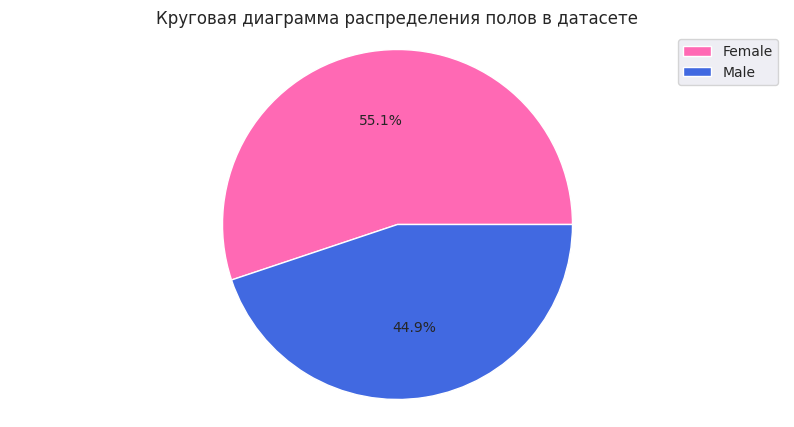

In [ ]:
# Круговая диаграмма
vals = sex
labels = ['Female', 'Male']
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(vals, autopct='%1.1f%%', colors=['hotpink','royalblue'])
ax.axis('equal')
plt.legend(labels=labels)
plt.title('Круговая диаграмма распределения полов в датасете')
plt.show()

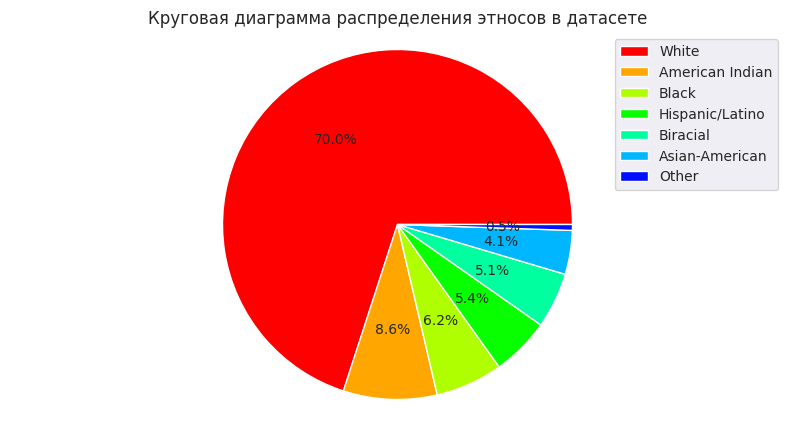

In [ ]:
# Круговая диаграмма
vals = Ethno
labels = ['White','American Indian','Black','Hispanic/Latino','Biracial','Asian-American','Other']
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(vals, autopct='%1.1f%%', colors=colors)
ax.axis('equal')
plt.legend(labels=labels)
plt.title('Круговая диаграмма распределения этносов в датасете')
plt.show()

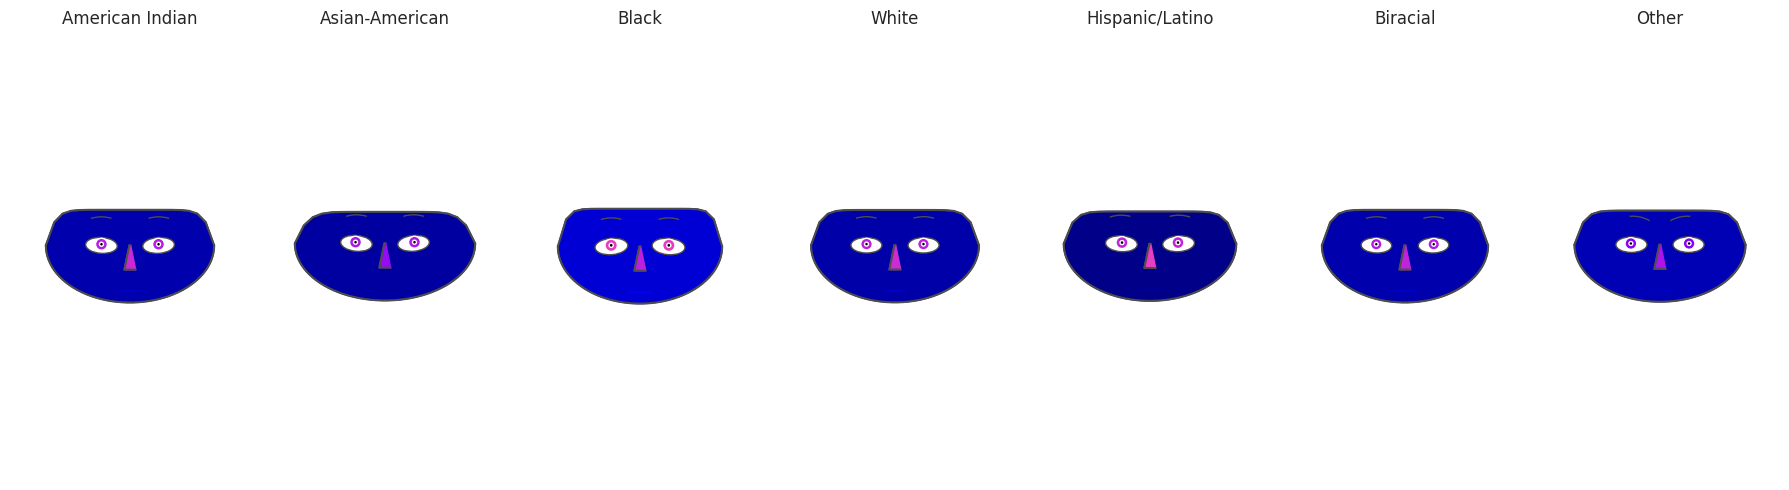

In [ ]:
# Лица Чернова
Ethno2 = pd.DataFrame(df2['ethnicity'])
Ethno2[['age','grip','chest','Fearfulness','Anxiety','Sentimentalism','Emotional']] = variables_rescale(df2[['age','grip','chest','Fearfulness','Anxiety','Sentimentalism','Emotional']])

df_spec = Ethno2.groupby(['ethnicity']).mean().reset_index()
df_spec = df_spec.drop(['ethnicity'], axis='columns')

fig = chernoff_face(data=df_spec, titles=['American Indian', 'Asian-American', 'Black', 'White', 'Hispanic/Latino', 'Biracial', 'Other'],
                    n_columns=7,
                    long_face=False,
                    color_mapper=matplotlib.cm.gnuplot2,
                    figsize=(18, 5), dpi=100)
fig.tight_layout()
matplotlib.pyplot.show()

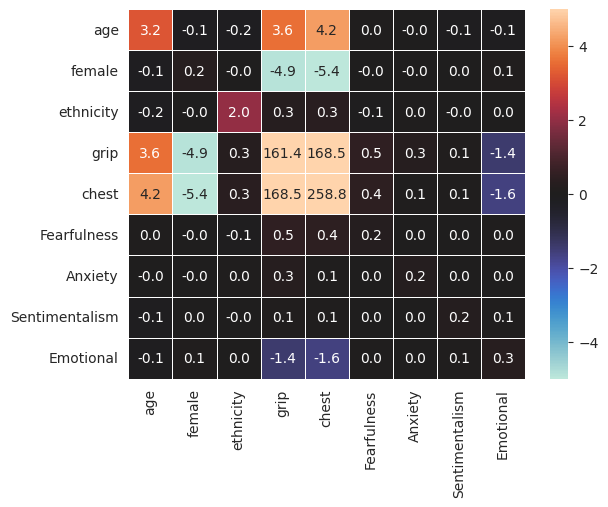

In [ ]:
# Ковариационная матрица
sns.heatmap(df2.cov(), annot=True, fmt=".1f", linewidths=0.5, linecolor='white', vmin=-5, vmax=5, center=0)
plt.show()

<Axes: >

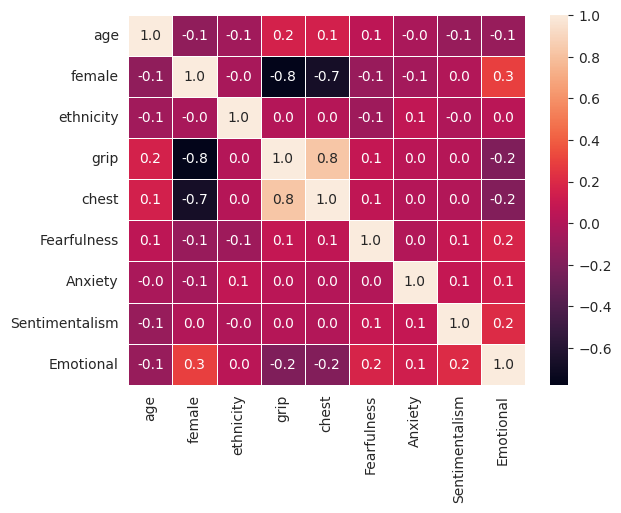

In [ ]:
# Корреляционная матрица
sns.heatmap(df2.corr(), annot = True, linewidths=0.5, linecolor='white', fmt=".1f")

Видим значимую положительную корреляцию силы хвата и жима лежа, небольшую связь между полом участника и эмоцональностью и отрицательную корреляцию женского пола и силовых признаков.

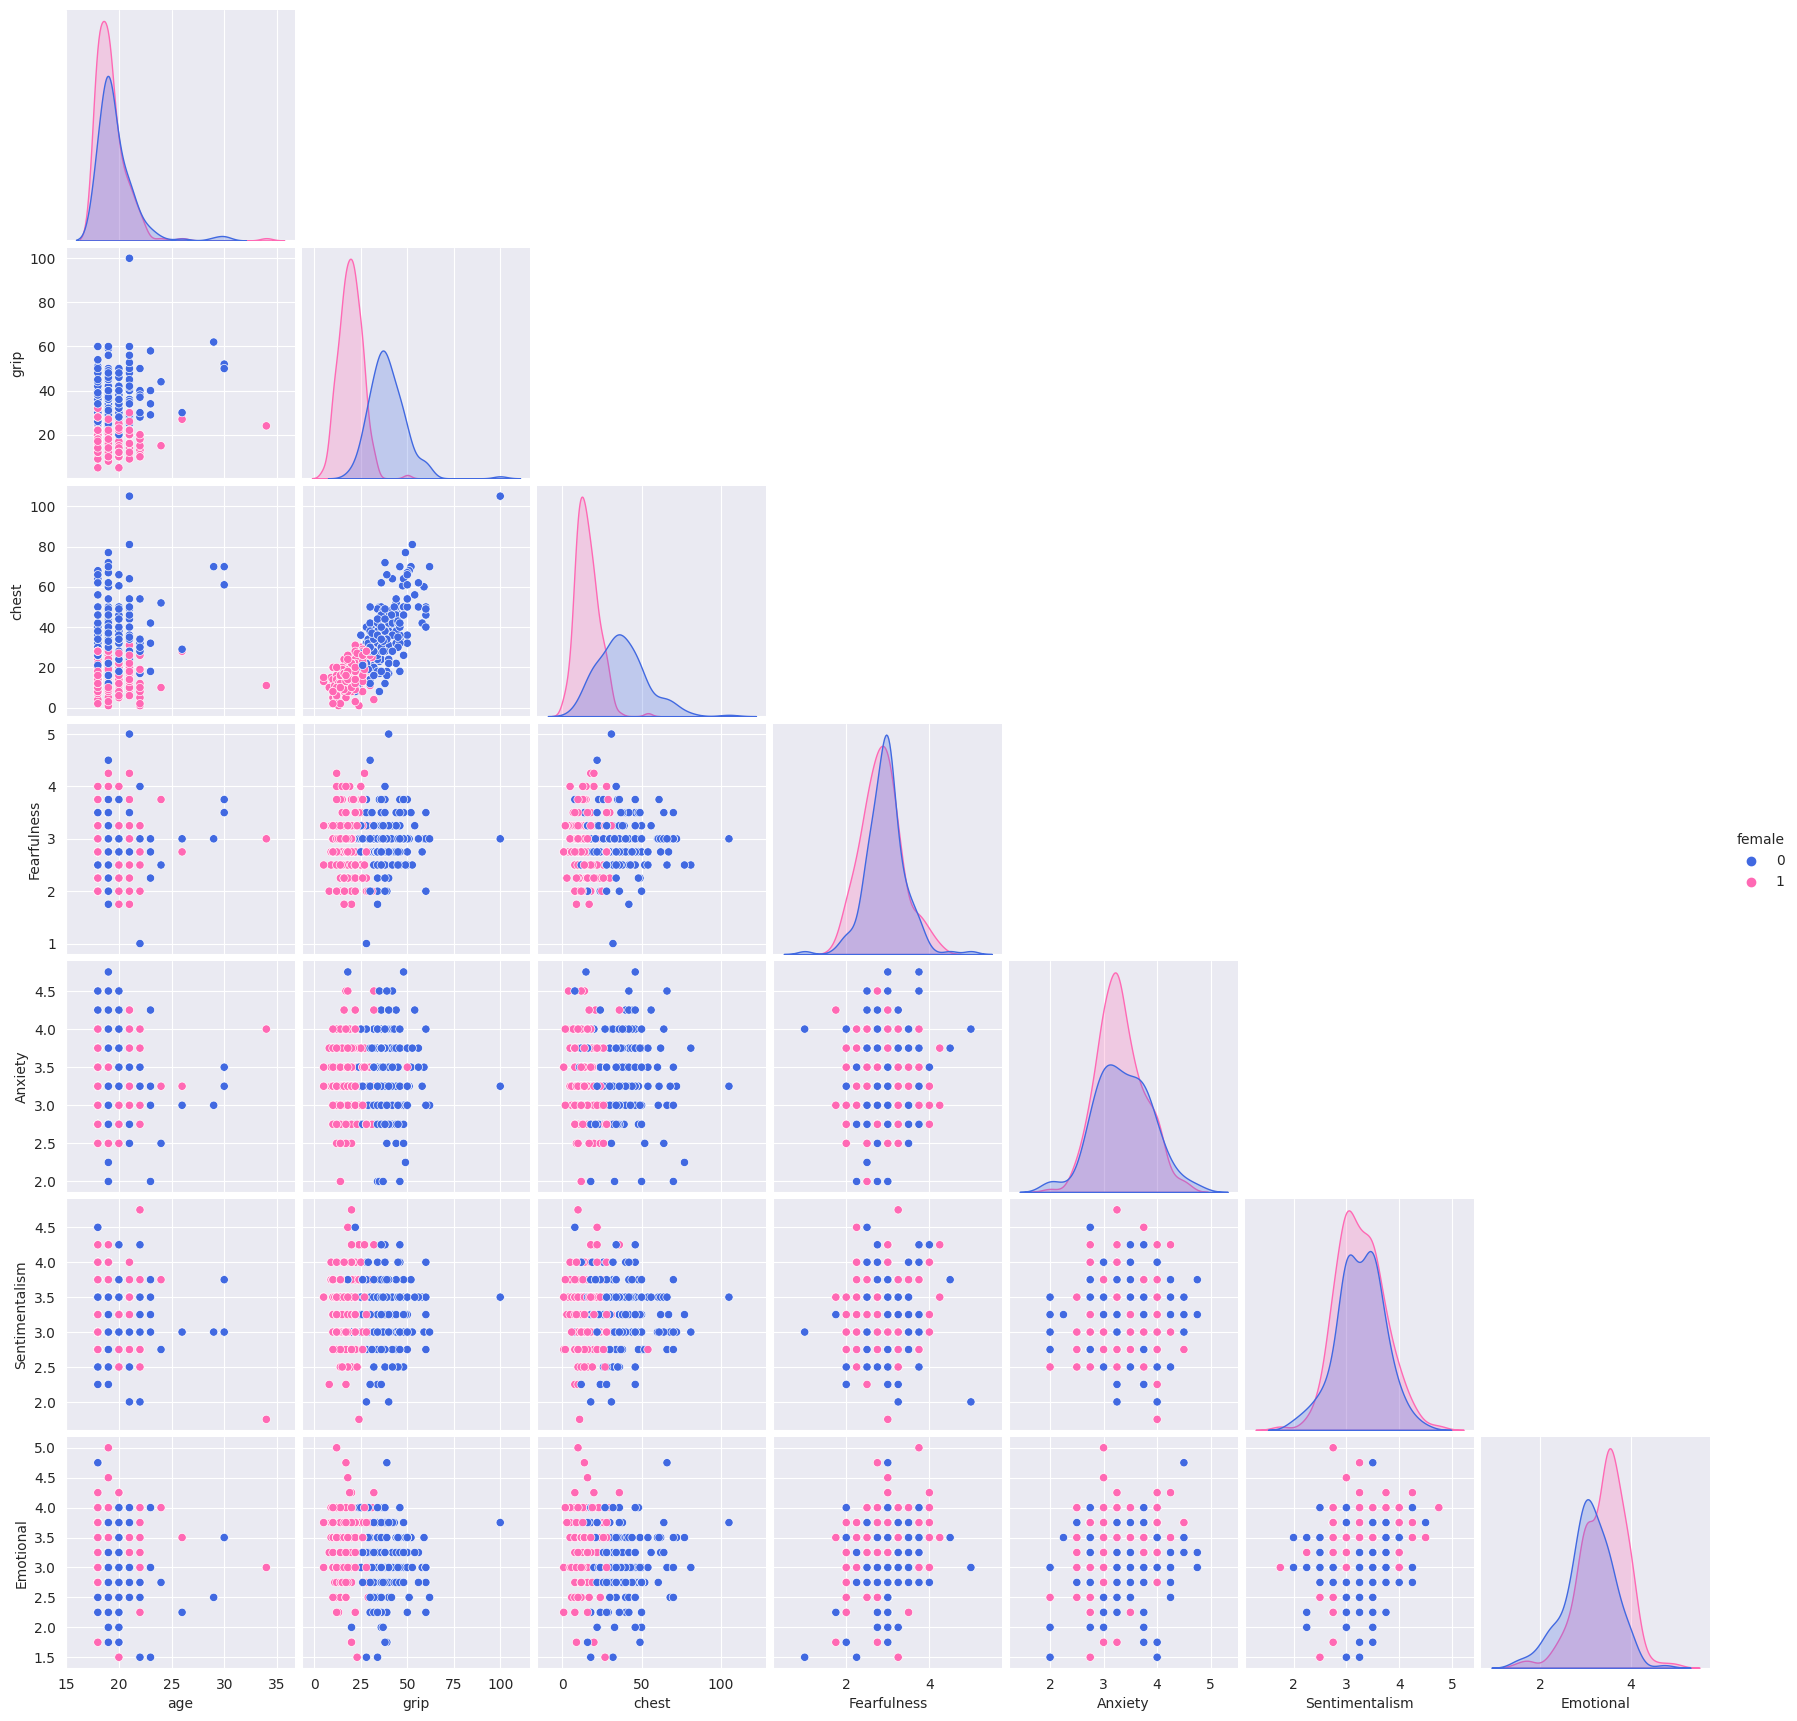

In [ ]:
sns.pairplot(df2, hue = "female", vars=['age','grip','chest','Fearfulness','Anxiety','Sentimentalism','Emotional'], corner=True, palette=['royalblue','hotpink'])

Наблюдаем линейную зависимость силы хвата и жима лежа. Также по графикам видим, что женщины имеют меньшие значения показателей силы и большую эмоциональность.

In [ ]:
# Гистограммы
fig = make_subplots(rows=3, cols=1)

trace0 = go.Histogram(x=df2['age'], name="age")
trace1 = go.Histogram(x=df2['grip'], name="grip")
trace2 = go.Histogram(x=df2['chest'], name="chest")
trace3 = go.Histogram(x=df2['Fearfulness'], name="Fearfulness")
trace4 = go.Histogram(x=df2['Anxiety'], name="Anxiety")
trace5 = go.Histogram(x=df2['Sentimentalism'], name="Sentimentalism")
trace6 = go.Histogram(x=df2['Emotional'], name="Emotional")

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 1)
fig.append_trace(trace6, 3, 1)

fig.update_layout(bargap=0.2)
fig.update_layout(title_text="Гистограммы для количественных признаков")
fig.show()

In [ ]:
# Интерактивный боксплот с распределением весов
box = []
for i in sex.index:
  box.append(go.Box(y=df2[df2['female']==i].grip, name=str(i)))
iplot(box)

На боксплотах присутствуют выбросы, но значения нельзя назвать аномальными.

<Axes: >

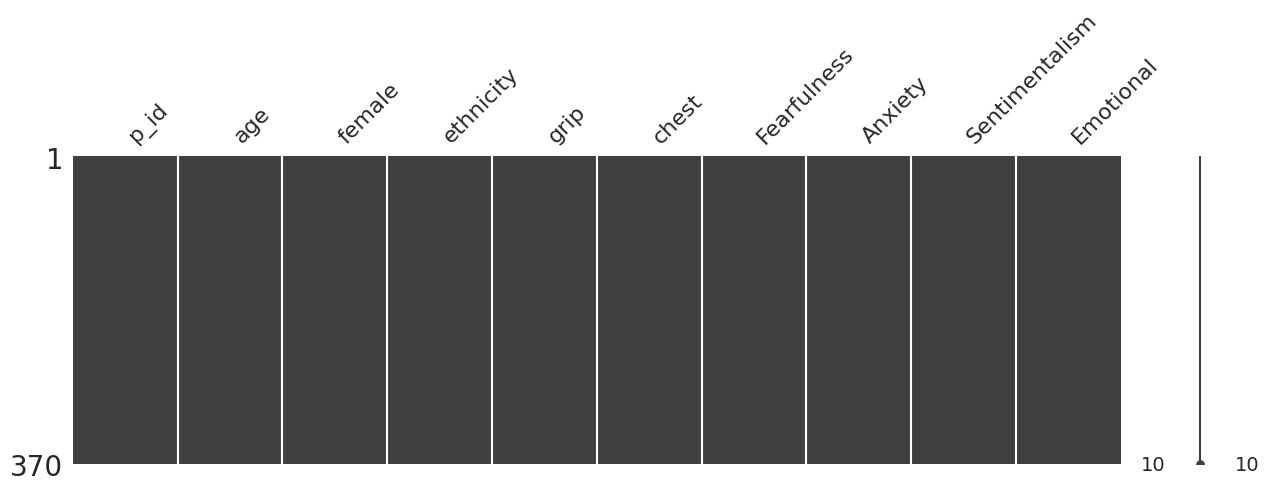

In [ ]:
msno.matrix(df2, figsize=(15, 4))

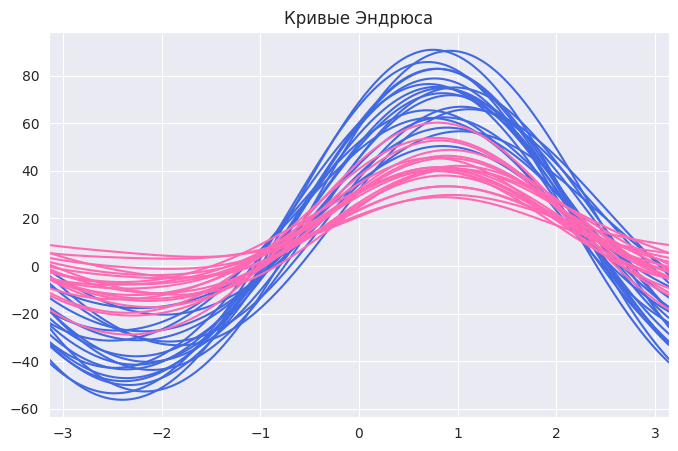

In [ ]:
#@title
# Кривые Эндрюса ['hotpink','royalblue']
sex_sort = df2.sort_values(by=['female'])
sex_sort = sex_sort.drop(['female','ethnicity','p_id'], axis='columns')
arr = np.array(sex_sort)

accuracy = 1000
samples = arr
theta = np.linspace(-np.pi, np.pi, accuracy)
pl.subplots(figsize=(8, 5))

for s in samples[:20]: # Male
  pl.plot(theta, andrews_curve(s, theta), label='Male', color='royalblue')

for s in samples[200:220]: # Female
  pl.plot(theta, andrews_curve(s ,theta), label='Female', color='hotpink')

pl.xlim(-np.pi,np.pi)
pl.title('Кривые Эндрюса')
# pl.legend()
pl.show()

## 2. РЕГРЕССИОННЫЙ АНАЛИЗ


**Парная регрессия**

In [ ]:
fit = smf.ols('grip ~ chest', data=df2).fit()

#view model summary
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   grip   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     780.2
Date:                Fri, 30 Jun 2023   Prob (F-statistic):           5.94e-93
Time:                        06:22:39   Log-Likelihood:                -1254.5
No. Observations:                 370   AIC:                             2513.
Df Residuals:                     368   BIC:                             2521.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.6716      0.703     16.599      0.0

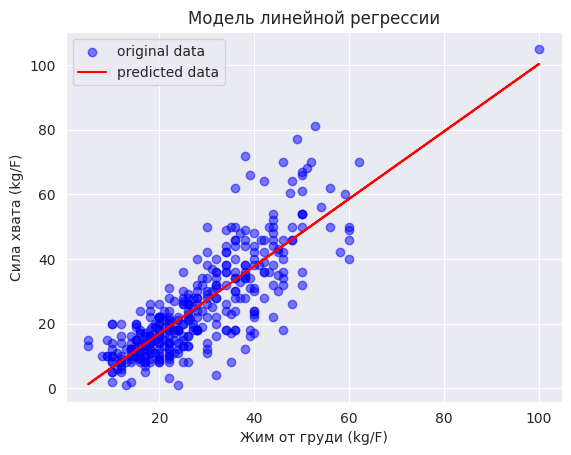

In [ ]:
a, b = np.polyfit(df2['grip'], df2['chest'], 1)
plt.scatter(df2['grip'], df2['chest'], color='blue', alpha=0.5, label = "original data")
plt.plot(df2['grip'], a*df2['grip']+b, color='red', alpha=1, label = "predicted data")
plt.legend()
plt.xlabel('Жим от груди (kg/F)')
plt.ylabel('Сила хвата (kg/F)')
plt.title('Модель линейной регрессии');

In [ ]:
import statsmodels.stats.api as sms
from scipy import stats

# perform Bresuch-Pagan test
test = sms.het_breuschpagan(fit.resid, fit.model.exog)
p_value = test[1]
if p_value < 0.05:
    print("Остатки гетероскедастичны.")
else:
    print("Остатки гомоскедастичны.")

# тест Шапиро-Уилка
stat, p = stats.shapiro(fit.resid)
alpha = 0.05
if p > alpha:
 print('Остатки распределены нормально.')
else:
 print('Остатки распределены ненормально.')

Остатки гетероскедастичны.
Отклоняем гипотезу о нормальности.


**Парная регрессия с делением на тренировочную и тестовую выборки**

In [ ]:
y = df2['grip']
X = df2['chest']
X = X.to_numpy().reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr=LinearRegression()
lr.fit(X_train, y_train)

y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
# Коэффициент детерминации R2
print(f'R2 на тренировочных данных: {r2_score(y_train, y_train_pred)}')
print(f'R2 на тестовых данных: {r2_score(y_test, y_test_pred)}')

R2 на тренировочных данных: 0.6795993021833696
R2 на тестовых данных: 0.6723607699308027


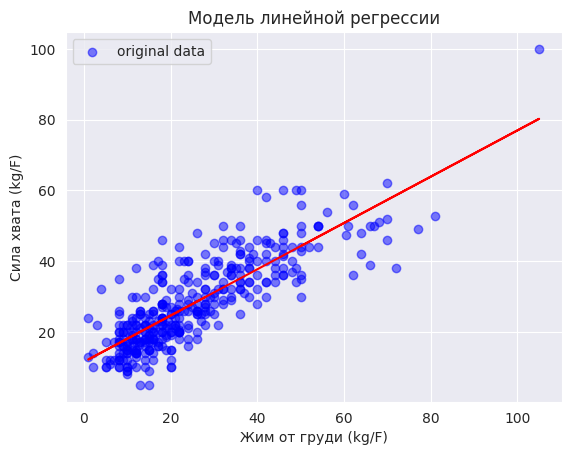

In [ ]:
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label = "original data")
plt.scatter(X_train, y_train, color='blue', alpha=0.5)
plt.plot(X_train, y_train_pred, color='red', alpha=1)
plt.legend()
plt.xlabel('Жим от груди (kg/F)')
plt.ylabel('Сила хвата (kg/F)')
plt.title('Модель линейной регрессии');

**Множественная регрессия**

In [ ]:
y = df2['grip']
df22 = df2.drop(['grip', 'p_id'], axis='columns')
X = df22

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr=LinearRegression()
lr.fit(X_train, y_train)

y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
# Коэффициент детерминации R2
print(f'R2 на тренировочных данных: {r2_score(y_train, y_train_pred)}')
print(f'R2 на тестовых данных: {r2_score(y_test, y_test_pred)}')


R2 на тренировочных данных: 0.7568984604530911
R2 на тестовых данных: 0.7889193168081288


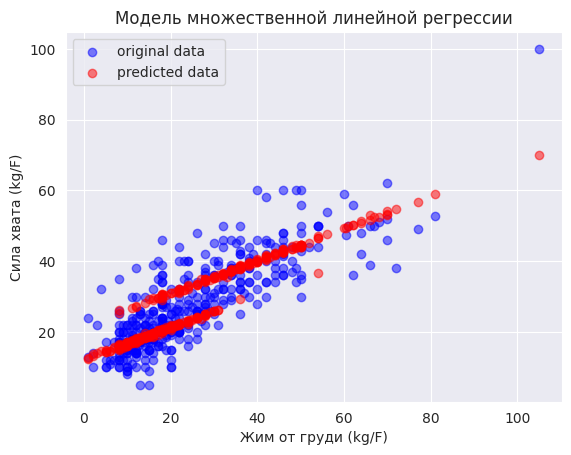

In [ ]:
plt.scatter(X_test['chest'], y_test, color='blue', alpha=0.5, label = "original data")
plt.scatter(X_train['chest'], y_train, color='blue', alpha=0.5)
plt.scatter(X_test['chest'], y_test_pred, color='red', alpha=0.5, label = "predicted data")
plt.scatter(X_train['chest'], y_train_pred, color='red', alpha=0.5)
plt.legend()
plt.xlabel('Жим от груди (kg/F)')
plt.ylabel('Сила хвата (kg/F)')
plt.title('Модель множественной линейной регрессии');

Многофакторная модель показала наиболее точный результат.

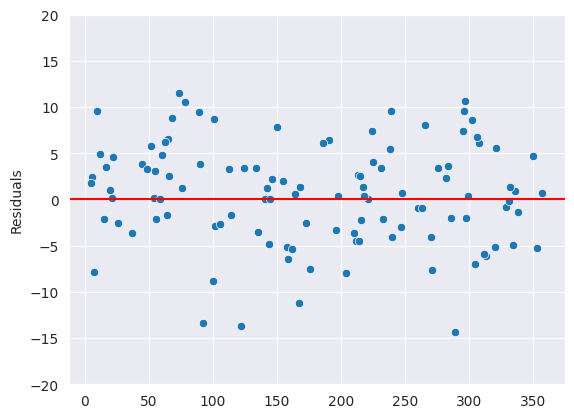

In [ ]:
residuals = y_test - y_test_pred
sns.scatterplot(residuals)
plt.axhline(y=0, color='r')
plt.ylabel('Residuals')
plt.ylim([-20,20])
plt.show()

Остатки случайным образом разбросаны вокруг нуля, это указывает на то, что гетероскедастичность не является проблемой для объясняющей переменной.

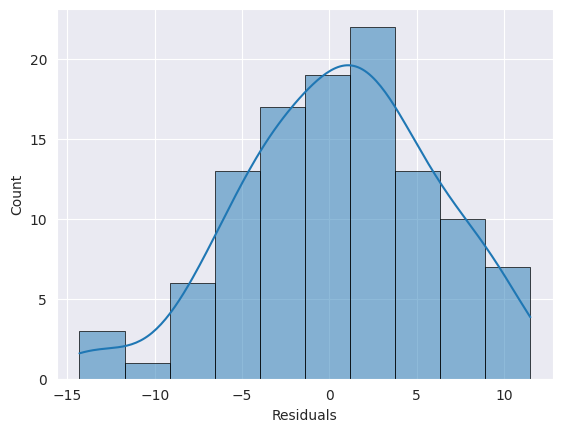

Остатки распределены ненормально.


In [ ]:
sns.histplot(residuals, edgecolor='k', linewidth=0.5,kde=True)
plt.xlabel('Residuals')
plt.show()

# тест Шапиро-Уилка
stat, p = stats.shapiro(fit.resid)
alpha = 0.05
if p > alpha:
 print('Остатки распределены нормально.')
else:
 print('Остатки распределены ненормально.')

**Выводы:** Выявили линейную зависимость силы хвата и жима лежа. Также обнаружили большое влияние пола студента на силовые показатели и эмоциальность. Построили линейную регрессию признаков grip - cgest. Увидели, что распределение остатков ненормально.